In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['ennerconll03v04pt', 'glovegensimvectorsnpy', 'enposontonotesv02pt', 'ner-tagged-disease']


In [2]:
!pip install allennlp

    100% |████████████████████████████████| 5.5MB 2.0MB/s 
    100% |████████████████████████████████| 1.5MB 9.1MB/s 
    100% |████████████████████████████████| 12.6MB 953kB/s 
    100% |████████████████████████████████| 4.5MB 2.7MB/s 
    100% |████████████████████████████████| 174kB 34.7MB/s 
    100% |████████████████████████████████| 133kB 37.7MB/s 
    100% |████████████████████████████████| 552kB 23.6MB/s 
    100% |████████████████████████████████| 512kB 29.4MB/s 
    100% |████████████████████████████████| 51kB 22.6MB/s 
    100% |████████████████████████████████| 5.3MB 7.7MB/s 
    100% |████████████████████████████████| 51kB 21.3MB/s 
    100% |████████████████████████████████| 71kB 25.7MB/s 
    100% |████████████████████████████████| 51kB 22.3MB/s 
    100% |████████████████████████████████| 61kB 23.0MB/s 
    100% |████████████████████████████████| 143kB 38.0MB/s 
    100% |████████████████████████████████| 51kB 23.0MB/s 
    100% |████████████████████████████████| 7.5MB 

In [3]:
from flair.data import Sentence
from flair.models import SequenceTagger

In [4]:
sentance1 = """
Overview
Acquired immunodeficiency syndrome (AIDS) is a chronic, potentially life-threatening condition caused by the human immunodeficiency virus (HIV). By damaging your immune system, HIV interferes with your body's ability to fight the organisms that cause disease.
HIV is a sexually transmitted infection (STI). It can also be spread by contact with infected blood or from mother to child during pregnancy, childbirth or breast-feeding. Without medication, it may take years before HIV weakens your immune system to the point that you have AIDS.

There's no cure for HIV/AIDS, but there are medications that can dramatically slow the progression of the disease. These drugs have reduced AIDS deaths in many developed nations.

Symptoms
The symptoms of HIV and AIDS vary, depending on the phase of infection.
Primary infection (Acute HIV)
Most people infected by HIV develop a flu-like illness within a month or two after the virus enters the body. This illness, known as primary or acute HIV infection, may last for a few weeks. Possible signs and symptoms include:
Fever
Headache
Muscle aches and joint pain
Rash
Sore throat and painful mouth sores
Swollen lymph glands, mainly on the neck
These symptoms can be so mild that you might not even notice them. However, the amount of virus in your bloodstream (viral load) is quite high at this time. As a result, the infection spreads more easily during primary infection than during the next stage.
Clinical latent infection (Chronic HIV)
In some people, persistent swelling of lymph nodes occurs during this stage. Otherwise, there are no specific signs and symptoms. HIV remains in the body and in infected white blood cells.
This stage of HIV infection generally lasts around 10 years if you're not receiving antiretroviral therapy. But sometimes, even with this treatment, it lasts for decades. Some people develop more severe disease much sooner.
Symptomatic HIV infection
As the virus continues to multiply and destroy your immune cells — the cells in your body that help fight off germs — you may develop mild infections or chronic signs and symptoms such as:
Fever
Fatigue
Swollen lymph nodes — often one of the first signs of HIV infection
Diarrhea
Weight loss
Oral yeast infection (thrush)
Shingles (herpes zoster)
Progression to AIDS
Thanks to better antiviral treatments, most people with HIV in the U.S. today don't develop AIDS. Untreated, HIV typically turns into AIDS in about 10 years.
When AIDS occurs, your immune system has been severely damaged. You'll be more likely to develop opportunistic infections or opportunistic cancers — diseases that wouldn't usually trouble a person with a healthy immune system.
The signs and symptoms of some of these infections may include:
Soaking night sweats
Recurring fever
Chronic diarrhea
Persistent white spots or unusual lesions on your tongue or in your mouth
Persistent, unexplained fatigue
Weight loss
Skin rashes or bumps
When to see a doctor
If you think you may have been infected with HIV or are at risk of contracting the virus, see a health care provider as soon as possible.

Request an Appointment at Mayo Clinic
Causes
HIV is caused by a virus. It can spread through sexual contact or blood, or from mother to child during pregnancy, childbirth or breast-feeding.
How does HIV become AIDS?
HIV destroys CD4 T cells — white blood cells that play a large role in helping your body fight disease. The fewer CD4 T cells you have, the weaker your immune system becomes.
You can have an HIV infection for years before it turns into AIDS. AIDS is diagnosed when the CD4 T cell count falls below 200 or you have an AIDS-defining complication.
How HIV spreads
To become infected with HIV, infected blood, semen or vaginal secretions must enter your body. This can happen in several ways:
By having sex. You may become infected if you have vaginal, anal or oral sex with an infected partner whose blood, semen or vaginal secretions enter your body. The virus can enter your body through mouth sores or small tears that sometimes develop in the rectum or vagina during sexual activity.
From blood transfusions. In some cases, the virus may be transmitted through blood transfusions. American hospitals and blood banks now screen the blood supply for HIV antibodies, so this risk is very small.
By sharing needles. Sharing contaminated intravenous drug paraphernalia (needles and syringes) puts you at high risk of HIV and other infectious diseases, such as hepatitis.
During pregnancy or delivery or through breast-feeding. Infected mothers can pass the virus on to their babies. HIV-positive mothers who get treatment for the infection during pregnancy can significantly lower the risk to their babies.
How HIV doesn't spread
You can't become infected with HIV through ordinary contact. That means you can't catch HIV or AIDS by hugging, kissing, dancing or shaking hands with someone who has the infection.
HIV isn't spread through the air, water or insect bites.
Risk factors
When HIV/AIDS first appeared in the United States, it mainly affected men who had sex with men. However, now it's clear that HIV also spreads through heterosexual sex.
Anyone of any age, race, sex or sexual orientation can be infected. However, you're at greatest risk of HIV/AIDS if you:
Have unprotected sex. Use a new latex or polyurethane condom every time you have sex. Anal sex is more risky than is vaginal sex. Your risk of HIV increases if you have multiple sexual partners.
Have an STI. Many STIs produce open sores on your genitals. These sores act as doorways for HIV to enter your body.
Use intravenous drugs. People who use intravenous drugs often share needles and syringes. This exposes them to droplets of other people's blood.
Are an uncircumcised man. Studies suggest that lack of circumcision increases the risk of heterosexual transmission of HIV.
Complications
HIV infection weakens your immune system, making you much more likely to develop numerous infections and certain types of cancers.
Infections common to HIV/AIDS
Tuberculosis (TB). In resource-limited nations, TB is the most common opportunistic infection associated with HIV. It's a leading cause of death among people with AIDS.
Cytomegalovirus. This common herpes virus is transmitted in body fluids such as saliva, blood, urine, semen and breast milk. A healthy immune system inactivates the virus, and it remains dormant in your body. If your immune system weakens, the virus resurfaces — causing damage to your eyes, digestive tract, lungs or other organs.
Candidiasis. Candidiasis is a common HIV-related infection. It causes inflammation and a thick, white coating on the mucous membranes of your mouth, tongue, esophagus or vagina.
Cryptococcal meningitis. Meningitis is an inflammation of the membranes and fluid surrounding your brain and spinal cord (meninges). Cryptococcal meningitis is a common central nervous system infection associated with HIV, caused by a fungus found in soil.
Toxoplasmosis. This potentially deadly infection is caused by Toxoplasma gondii, a parasite spread primarily by cats. Infected cats pass the parasites in their stools, which may then spread to other animals and humans. Seizures occur when it spreads to the brain.
Cryptosporidiosis. This infection is caused by an intestinal parasite that's commonly found in animals. You get it when you eat or drink contaminated food or water. The parasite grows in your intestines and bile ducts, leading to severe, chronic diarrhea in people with AIDS.
Cancers common to HIV/AIDS
Kaposi's sarcoma. A tumor of the blood vessel walls, this cancer is rare in people not infected with HIV, but common in HIV-positive people. It usually appears as pink, red or purple lesions on the skin and mouth. In people with darker skin, the lesions may look dark brown or black. Kaposi's sarcoma can also affect the internal organs, including the digestive tract and lungs.
Lymphoma. This cancer starts in the white blood cells. The most common early sign is painless swelling of the lymph nodes in your neck, armpit or groin.
Other complications
Wasting syndrome. Aggressive treatment approaches have reduced the number of cases of wasting syndrome, but it still affects many people with AIDS. It's defined as a loss of at least 10 percent of body weight, often accompanied by diarrhea, chronic weakness and fever.
Neurological complications. Although AIDS doesn't appear to infect the nerve cells, it can cause neurological symptoms such as confusion, forgetfulness, depression, anxiety and difficulty walking. One of the most common neurological complications is AIDS dementia complex, which leads to behavioral changes and reduced mental functioning.
Kidney disease. HIV-associated nephropathy (HIVAN) is an inflammation of the tiny filters in your kidneys that remove excess fluid and wastes from your blood and pass them to your urine. It most often affects blacks or Hispanics. Anyone with this complication should be started on antiretroviral therapy.
Prevention
There's no vaccine to prevent HIV infection and no cure for AIDS. But you can protect yourself and others from infection.
To help prevent the spread of HIV:
Use a new condom every time you have sex. Use a new condom every time you have anal or vaginal sex. Women can use a female condom. If using lubricant, make sure it's water-based. Oil-based lubricants can weaken condoms and cause them to break. During oral sex use a nonlubricated, cut-open condom or a dental dam — a piece of medical-grade latex.
Consider the drug Truvada. The drug emtricitabine-tenofovir (Truvada) can reduce the risk of sexually transmitted HIV infection in people at very high risk. You need to take it every day. It doesn't prevent other STIs, so you'll still need to practice safe sex. If you have hepatitis B you should be evaluated by an infectious disease or liver specialist before beginning therapy. You will need a blood test to check your kidney function before taking this drug.
Tell your sexual partners if you have HIV. It's important to tell all your current and past sexual partners that you're HIV-positive. They'll need to be tested.
Use a clean needle. If you use a needle to inject drugs, make sure it's sterile and don't share it. Take advantage of needle-exchange programs in your community and consider seeking help for your drug use.
If you're pregnant, get medical care right away. If you're HIV-positive, you may pass the infection to your baby. But if you receive treatment during pregnancy, you can cut your baby's risk significantly.
Consider male circumcision. There's evidence that male circumcision can help reduce a man's risk of getting HIV infection.
"""

In [5]:
sent1="""
"Overview

Abdominal aortic aneurysm

An abdominal aortic aneurysm is an enlarged area in the lower part of the aorta, the major blood vessel that supplies blood to the body. The aorta, about the thickness of a garden hose, runs from your heart through the center of your chest and abdomen.
Because the aorta is the body's main supplier of blood, a ruptured abdominal aortic aneurysm can cause life-threatening bleeding.

Depending on the size and the rate at which your abdominal aortic aneurysm is growing, treatment may vary from watchful waiting to emergency surgery.
Once an abdominal aortic aneurysm is found, doctors will closely monitor it so that surgery can be planned if it's necessary. Emergency surgery for a ruptured abdominal aortic aneurysm can be risky.

Symptoms
Abdominal aortic aneurysms often grow slowly and usually without symptoms, making them difficult to detect. Some aneurysms will never rupture. Many start small and stay small, although many expand over time. Others expand quickly. Predicting how fast an abdominal aortic aneurysm may enlarge is difficult.
As an abdominal aortic aneurysm enlarges, some people may notice:
A pulsating feeling near the navel
Deep, constant pain in your abdomen or on the side of your abdomen
Back pain
If you have any of these signs and symptoms, such as sudden severe back or abdominal pain, get immediate emergency help.
When to see a doctor
You should see your doctor if you have any of the symptoms listed above. The recommendations below are for those who have no symptoms.
Because being male and smoking significantly increase the risk of abdominal aortic aneurysm, men ages 65 to 75 who have ever smoked cigarettes should have a screening for abdominal aortic aneurysms using abdominal ultrasound. If you are a man between ages 65 and 75 and you have never smoked, your doctor will decide on the need for an abdominal ultrasound, usually based on other risk factors, such as a family history of aneurysm. Those with a family history of aneurysm may have an ultrasound at age 60.
There isn't enough evidence to determine whether women ages 65 to 75 who have ever smoked cigarettes or have a family history of abdominal aortic aneurysm would benefit from abdominal aortic aneurysm screening. Ask your doctor if you need to have an ultrasound screening based on your risk factors. Women who have never smoked generally don't need to be screened for the condition.

Request an Appointment at Mayo Clinic
Causes
Most aortic aneurysms occur in the part of your aorta that's in your abdomen. Although the exact cause of abdominal aortic aneurysms is unknown, a number of factors may play a role, including:
Tobacco use. Cigarette smoking and other forms of tobacco use appear to increase your risk of aortic aneurysms. Smoking can be damaging to the aorta and weaken the aorta's walls.
Hardening of the arteries (atherosclerosis). Atherosclerosis occurs when fat and other substances build up on the lining of a blood vessel. This condition may increase your risk of an aneurysm.
High blood pressure. High blood pressure can increase your risk of abdominal aortic aneurysms as it can damage and weaken the aorta's walls.
Blood vessel diseases in the aorta. Abdominal aortic aneurysms can be caused by diseases that cause blood vessels to become inflamed.
Infection in the aorta. Infections, such as a bacterial or fungal infection, may rarely cause abdominal aortic aneurysms.
Trauma. Trauma, such as being in a car accident, can cause abdominal aortic aneurysms.
Heredity. In some cases, abdominal aortic aneurysms could be hereditary.
Aneurysms can develop anywhere along the aorta, but when they occur in the upper part of the aorta, in the chest, they are called thoracic aortic aneurysms. More commonly, aneurysms form in the lower part of your aorta and are called abdominal aortic aneurysms. These aneurysms may also be referred to as AAA.
Risk factors
Abdominal aortic aneurysm risk factors include:
Age. Abdominal aortic aneurysms occur most often in people age 65 and older.
Tobacco use. Tobacco use is a strong risk factor for the development of an abdominal aortic aneurysm and a higher risk of rupture. The longer you've smoked or chewed tobacco and the more cigarettes you smoked per day, the greater your risk.
Being male. Men develop abdominal aortic aneurysms much more often than women do.
Being white. People who are white are at higher risk of abdominal aortic aneurysms.
Family history. People who have a family history of abdominal aortic aneurysms are at increased risk of having the condition.
Atherosclerosis. Atherosclerosis — the buildup of fat and other substances that can damage the lining of a blood vessel — increases your risk of an aneurysm.
Other aneurysms. People who have an aneurysm in another large blood vessel, such as the artery behind the knee or the thoracic aorta in the chest, may have a higher risk of developing an abdominal aortic aneurysm.
High blood pressure. High blood pressure may increase your risk of developing an abdominal aortic aneurysm.
Complications
Tears in one or more of the layers of the wall of the aorta (aortic dissection) or a ruptured aortic aneurysm are the main complications of abdominal aortic aneurysms. A ruptured aortic aneurysm can lead to life-threatening internal bleeding. In general, the larger the aneurysm and the faster the aneurysm grows, the greater the risk of rupture.
Signs and symptoms that your aortic aneurysm has ruptured may include:
Sudden, intense and persistent abdominal or back pain, which can be described as a tearing sensation
Pain that radiates to your back or legs
Sweatiness
Clamminess
Dizziness
Nausea
Vomiting
Low blood pressure
Fast pulse
Another complication of aortic aneurysms is the risk of blood clots. Small blood clots can develop in the area of the aortic aneurysm. If a blood clot breaks loose from the inside wall of an aneurysm and blocks a blood vessel elsewhere in your body, it can cause pain or block the blood flow to the legs, toes, kidneys or abdominal organs."
"Overview
Cancer refers to any one of a large number of diseases characterized by the development of abnormal cells that divide uncontrollably and have the ability to infiltrate and destroy normal body tissue. Cancer often has the ability to spread throughout your body.
Cancer is the second-leading cause of death in the world. But survival rates are improving for many types of cancer, thanks to improvements in cancer screening and cancer treatment.


Symptoms
Signs and symptoms caused by cancer will vary depending on what part of the body is affected.
Some general signs and symptoms associated with, but not specific to, cancer, include:
Fatigue
Lump or area of thickening that can be felt under the skin
Weight changes, including unintended loss or gain
Skin changes, such as yellowing, darkening or redness of the skin, sores that won't heal, or changes to existing moles
Changes in bowel or bladder habits
Persistent cough or trouble breathing
Difficulty swallowing
Hoarseness
Persistent indigestion or discomfort after eating
Persistent, unexplained muscle or joint pain
Persistent, unexplained fevers or night sweats
Unexplained bleeding or bruising
When to see a doctor
Make an appointment with your doctor if you have any persistent signs or symptoms that concern you.
If you don't have any signs or symptoms, but are worried about your risk of cancer, discuss your concerns with your doctor. Ask about which cancer screening tests and procedures are appropriate for you.

Request an Appointment at Mayo Clinic
Causes
Cancer is caused by changes (mutations) to the DNA within cells. The DNA inside a cell is packaged into a large number of individual genes, each of which contains a set of instructions telling the cell what functions to perform, as well as how to grow and divide. Errors in the instructions can cause the cell to stop its normal function and may allow a cell to become cancerous.
What do gene mutations do?
A gene mutation can instruct a healthy cell to:
Allow rapid growth. A gene mutation can tell a cell to grow and divide more rapidly. This creates many new cells that all have that same mutation.
Fail to stop uncontrolled cell growth. Normal cells know when to stop growing so that you have just the right number of each type of cell. Cancer cells lose the controls (tumor suppressor genes) that tell them when to stop growing. A mutation in a tumor suppressor gene allows cancer cells to continue growing and accumulating.
Make mistakes when repairing DNA errors. DNA repair genes look for errors in a cell's DNA and make corrections. A mutation in a DNA repair gene may mean that other errors aren't corrected, leading cells to become cancerous.
These mutations are the most common ones found in cancer. But many other gene mutations can contribute to causing cancer.
What causes gene mutations?
Gene mutations can occur for several reasons, for instance:
Gene mutations you're born with. You may be born with a genetic mutation that you inherited from your parents. This type of mutation accounts for a small percentage of cancers.
Gene mutations that occur after birth. Most gene mutations occur after you're born and aren't inherited. A number of forces can cause gene mutations, such as smoking, radiation, viruses, cancer-causing chemicals (carcinogens), obesity, hormones, chronic inflammation and a lack of exercise.
Gene mutations occur frequently during normal cell growth. However, cells contain a mechanism that recognizes when a mistake occurs and repairs the mistake. Occasionally, a mistake is missed. This could cause a cell to become cancerous.
How do gene mutations interact with each other?
The gene mutations you're born with and those that you acquire throughout your life work together to cause cancer.
For instance, if you've inherited a genetic mutation that predisposes you to cancer, that doesn't mean you're certain to get cancer. Instead, you may need one or more other gene mutations to cause cancer. Your inherited gene mutation could make you more likely than other people to develop cancer when exposed to a certain cancer-causing substance.
It's not clear just how many mutations must accumulate for cancer to form. It's likely that this varies among cancer types.
Risk factors
While doctors have an idea of what may increase your risk of cancer, the majority of cancers occur in people who don't have any known risk factors. Factors known to increase your risk of cancer include:
Your age
Cancer can take decades to develop. That's why most people diagnosed with cancer are 65 or older. While it's more common in older adults, cancer isn't exclusively an adult disease — cancer can be diagnosed at any age.
Your habits
Certain lifestyle choices are known to increase your risk of cancer. Smoking, drinking more than one alcoholic drink a day (for women of all ages and men older than age 65) or two drinks a day (for men age 65 and younger), excessive exposure to the sun or frequent blistering sunburns, being obese, and having unsafe sex can contribute to cancer.
You can change these habits to lower your risk of cancer — though some habits are easier to change than others.
Your family history
Only a small portion of cancers are due to an inherited condition. If cancer is common in your family, it's possible that mutations are being passed from one generation to the next. You might be a candidate for genetic testing to see whether you have inherited mutations that might increase your risk of certain cancers. Keep in mind that having an inherited genetic mutation doesn't necessarily mean you'll get cancer.
Your health conditions
Some chronic health conditions, such as ulcerative colitis, can markedly increase your risk of developing certain cancers. Talk to your doctor about your risk.
Your environment
The environment around you may contain harmful chemicals that can increase your risk of cancer. Even if you don't smoke, you might inhale secondhand smoke if you go where people are smoking or if you live with someone who smokes. Chemicals in your home or workplace, such as asbestos and benzene, also are associated with an increased risk of cancer.
Complications
Cancer and its treatment can cause several complications, including:
Pain. Pain can be caused by cancer or by cancer treatment, though not all cancer is painful. Medications and other approaches can effectively treat cancer-related pain.
Fatigue. Fatigue in people with cancer has many causes, but it can often be managed. Fatigue associated with chemotherapy or radiation therapy treatments is common, but it's usually temporary.
Difficulty breathing. Cancer or cancer treatment may cause a feeling of being short of breath. Treatments may bring relief.
Nausea. Certain cancers and cancer treatments can cause nausea. Your doctor can sometimes predict if your treatment is likely to cause nausea. Medications and other treatments may help you prevent or decrease nausea.
Diarrhea or constipation. Cancer and cancer treatment can affect your bowels and cause diarrhea or constipation.
Weight loss. Cancer and cancer treatment may cause weight loss. Cancer steals food from normal cells and deprives them of nutrients. This is often not affected by how many calories or what kind of food is eaten; it's difficult to treat. In most cases, using artificial nutrition through tubes into the stomach or vein does not help change the weight loss.
Chemical changes in your body. Cancer can upset the normal chemical balance in your body and increase your risk of serious complications. Signs and symptoms of chemical imbalances might include excessive thirst, frequent urination, constipation and confusion.
Brain and nervous system problems. Cancer can press on nearby nerves and cause pain and loss of function of one part of your body. Cancer that involves the brain can cause headaches and stroke-like signs and symptoms, such as weakness on one side of your body.
Unusual immune system reactions to cancer. In some cases the body's immune system may react to the presence of cancer by attacking healthy cells. Called paraneoplastic syndrome, these very rare reactions can lead to a variety of signs and symptoms, such as difficulty walking and seizures.
Cancer that spreads. As cancer advances, it may spread (metastasize) to other parts of the body. Where cancer spreads depends on the type of cancer.
Cancer that returns. Cancer survivors have a risk of cancer recurrence. Some cancers are more likely to recur than others. Ask your doctor about what you can do to reduce your risk of cancer recurrence. Your doctor may devise a follow-up care plan for you after treatment. This plan may include periodic scans and exams in the months and years after your treatment, to look for cancer recurrence.
Prevention
There's no certain way to prevent cancer. But doctors have identified several ways of reducing your cancer risk, such as:
Stop smoking. If you smoke, quit. If you don't smoke, don't start. Smoking is linked to several types of cancer — not just lung cancer. Stopping now will reduce your risk of cancer in the future.
Avoid excessive sun exposure. Harmful ultraviolet (UV) rays from the sun can increase your risk of skin cancer. Limit your sun exposure by staying in the shade, wearing protective clothing or applying sunscreen.
Eat a healthy diet. Choose a diet rich in fruits and vegetables. Select whole grains and lean proteins.
Exercise most days of the week. Regular exercise is linked to a lower risk of cancer. Aim for at least 30 minutes of exercise most days of the week. If you haven't been exercising regularly, start out slowly and work your way up to 30 minutes or longer.
Maintain a healthy weight. Being overweight or obese may increase your risk of cancer. Work to achieve and maintain a healthy weight through a combination of a healthy diet and regular exercise.
Drink alcohol in moderation, if you choose to drink. If you choose to drink alcohol, limit yourself to one drink a day if you're a woman of any age or a man older than age 65, or two drinks a day if you're a man 65 years old or younger.
Schedule cancer screening exams. Talk to your doctor about what types of cancer screening exams are best for you based on your risk factors.
Ask your doctor about immunizations. Certain viruses increase your risk of cancer. Immunizations may help prevent those viruses, including hepatitis B, which increases the risk of liver cancer, and human papillomavirus (HPV), which increases the risk of cervical cancer and other cancers. Ask your doctor whether immunization against these viruses is appropriate for you."
"Overview
Bile reflux occurs when bile — a digestive liquid produced in your liver — backs up (refluxes) into your stomach and, in some cases, into the tube that connects your mouth and stomach (esophagus).
Bile reflux may accompany the reflux (backwash) of stomach acid (gastric acid) into your esophagus. Gastric reflux may lead to gastroesophageal reflux disease (GERD), a potentially serious problem that causes irritation and inflammation of esophageal tissue (esophagitis).

Bile reflux and gastric acid reflux are separate conditions. Whether bile is important in GERD is controversial. Bile is often a suspected of contributing to GERD when people respond incompletely or not at all to powerful acid-suppressant medications. But there is little evidence pinpointing the effects of bile reflux in people.
Unlike gastric acid reflux, bile reflux can't be completely controlled by changes in diet or lifestyle. Treatment involves medications or, in severe cases, surgery.

Symptoms
Bile reflux can be difficult to distinguish from gastric acid reflux. The signs and symptoms are similar, and the two conditions may occur at the same time.
Bile reflux signs and symptoms include:
Upper abdominal pain that may be severe
Frequent heartburn — a burning sensation in your chest that sometimes spreads to your throat, along with a sour taste in your mouth
Nausea
Vomiting a greenish-yellow fluid (bile)
Occasionally, a cough or hoarseness
Unintended weight loss
When to see a doctor
Make an appointment with your doctor if you frequently experience symptoms of reflux, or if you're losing weight without trying.
If you've been diagnosed with GERD but aren't getting adequate relief from your medications, call your doctor. You may need additional treatment for bile reflux.

Request an Appointment at Mayo Clinic
Causes

Stomach and pyloric valve


How heartburn and GERD occur

Bile is a greenish-yellow fluid that is essential for digesting fats and for eliminating worn-out red blood cells and certain toxins from your body. Bile is produced in your liver and stored in your gallbladder.
Eating a meal that contains even a small amount of fat signals your gallbladder to release bile, which flows through two small tubes (cystic duct and common bile duct) into the upper part of your small intestine (duodenum).
Bile reflux into the stomach
Bile and food mix in the duodenum and enter your small intestine through the pyloric valve, a heavy ring of muscle located at the outlet of your stomach. The pyloric valve usually opens only slightly — enough to release about an eighth of an ounce (about 3.5 milliliters) of liquefied food at a time, but not enough to allow digestive juices to reflux into the stomach. In many cases of bile reflux, the valve doesn't close properly, and bile washes back into the stomach. This can lead to inflammation of the stomach lining (bile reflux gastritis).
Bile reflux into the esophagus
Bile and stomach acid can reflux into the esophagus when another muscular valve, the lower esophageal sphincter, malfunctions. The lower esophageal sphincter separates the esophagus and stomach. The valve normally opens just long enough to allow food to pass into the stomach. But if the valve weakens or relaxes abnormally, bile can wash back into the esophagus.
What leads to bile reflux?
Bile reflux may be caused by:
Surgery complications. Gastric surgery, including total removal of the stomach (gastrectomy) and gastric bypass surgery for weight loss, is responsible for most bile reflux.
Peptic ulcers. A peptic ulcer can block the pyloric valve so that it doesn't open enough to allow the stomach to empty as quickly as it should. Stagnant food in the stomach can lead to increased gastric pressure and allow bile and stomach acid to back up into the esophagus.
Gallbladder surgery (cholecystectomy). People who have had their gallbladders removed have significantly more bile reflux than do people who haven't had this surgery.
Complications
Bile reflux gastritis has been linked to stomach cancer. The combination of bile and acid reflux also increases the risk of the following complications:
GERD. This condition is most often due to excess acid. Although bile has been implicated, its importance in gastric acid reflux is controversial.
Barrett's esophagus. This serious condition can occur when long-term exposure to stomach acid, or to acid and bile, damages tissue in the lower esophagus. The damaged esophageal cells have an increased risk of becoming cancerous. Animal studies have also linked bile reflux to the occurrence of Barrett's esophagus.
Esophageal cancer. This form of cancer may not be diagnosed until it's quite advanced. The possible link between bile and acid reflux and esophageal cancer remains controversial, but many experts think a direct connection exists. In animal studies, bile reflux alone has been shown to cause cancer of the esophagus."
"Overview

Blepharitis

Blepharitis (blef-uh-RYE-tis) is inflammation of the eyelids. Blepharitis usually involves the part of the eyelid where the eyelashes grow and affects both eyelids.
Blepharitis commonly occurs when tiny oil glands located near the base of the eyelashes become clogged. This leads to irritated and red eyes. Several diseases and conditions can cause blepharitis.

Blepharitis is often a chronic condition that is difficult to treat. Blepharitis can be uncomfortable and may be unsightly. But it usually doesn't cause permanent damage to your eyesight, and it's not contagious.

Symptoms
Blepharitis symptoms and signs include:
Watery eyes
Red eyes
A gritty, burning or stinging sensation in the eyes
Eyelids that appear greasy
Itchy eyelids
Red, swollen eyelids
Flaking of the skin around the eyes
Crusted eyelashes upon awakening
Eyelid sticking
More frequent blinking
Sensitivity to light
Eyelashes that grow abnormally (misdirected eyelashes)
Loss of eyelashes
When to see a doctor
If you have blepharitis symptoms and signs that don't seem to be improving despite good hygiene — regular cleaning and care of the affected area — make an appointment with your doctor.

Request an Appointment at Mayo Clinic
Causes
The exact cause of blepharitis isn't clear. It may be associated with one or more factors, including:
Seborrheic dermatitis — dandruff of the scalp and eyebrows
A bacterial infection
Clogged or malfunctioning oil glands in your eyelids
Rosacea — a skin condition characterized by facial redness
Allergies, including allergic reactions to eye medications, contact lens solutions or eye makeup
Eyelash mites or lice
Complications

Sty


Chalazion

If you have blepharitis, you may also experience:
Eyelash problems. Blepharitis can cause your eyelashes to fall out or grow abnormally (misdirected eyelashes).
Eyelid skin problems. Scarring may occur on your eyelids in response to long-term blepharitis. Or the eyelid edges may turn inward or outward.
Excess tearing or dry eyes. Abnormal oily secretions and other debris shed from the eyelids, such as flaking associated with dandruff, can accumulate in your tear film — the water, oil and mucus solution that forms tears. Abnormal tear film interferes with the healthy lubrication of your eyelids. This can irritate your eyes and cause symptoms of dry eyes or excess tearing.
Difficulty wearing contact lenses. Because blepharitis can affect the amount of lubrication in your eyes, wearing contact lenses may be uncomfortable.
Sty. A sty is an infection that develops near the base of the eyelashes. The result is a painful lump on the edge (usually on the outside part) of your eyelid. A sty is usually most visible on the surface of the eyelid.
Chalazion. A chalazion occurs when there's a blockage in one of the small oil glands at the margin of the eyelid, just behind the eyelashes. The gland can become infected with bacteria, which causes a red, swollen eyelid. Unlike a sty, a chalazion tends to be most prominent on the inside of the eyelid.
Chronic pink eye. Blepharitis can lead to recurrent bouts of pink eye (conjunctivitis).
Injury to the cornea. Constant irritation from inflamed eyelids or misdirected eyelashes may cause a sore (ulcer) to develop on your cornea. Insufficient tearing could predispose you to a corneal infection."
"Overview

Bladder exstrophy in a female infant


Bladder exstrophy in a male infant

Bladder exstrophy (EK-stroh-fee) is a rare birth defect in which the bladder develops outside the fetus. The condition is more common in males than in females. The exposed bladder and urethra — the tube that expels urine — result in the bladder being unable to store urine.

Bladder exstrophy is the most common of a larger group of birth defects called the bladder exstrophy-epispadias (EK-stroh-fee-ep-ih-SPAY-dee-us) complex (BEEC). Defects resulting from this complex range from mild to severe. Bladder exstrophy itself also has a range of severity and, in addition to the abnormalities in the bladder, genitals and pelvic bones, may include defects in the intestines and reproductive organs.
Often doctors will identify bladder exstrophy on an ultrasound during pregnancy. Sometimes, though, the defect isn't visible until after the baby is born.
Surgeons treat bladder exstrophy after birth. Surgical repair is usually done at age 3 months or later. Sometimes two or more procedures are needed. Some children require additional surgery around age 4.
With surgery, and sometimes with medication, many children achieve bladder control (continence).

Symptoms
Bladder exstrophy is the most common of a larger group of birth defects called the bladder exstrophy-epispadias complex (BEEC). As the fetus grows, a structure called the cloaca (klo-AY-kuh) — where reproductive, urinary and digestive openings all come together — does not develop properly. The resulting defects can range greatly in severity depending on the age of the fetus when the developmental error occurs. If your child has BEEC, he or she will have one of the following:
Epispadias. This is the least severe form of BEEC, in which the tube to expel urine (urethra) does not fully develop.
Bladder exstrophy. This is the most common form of BEEC. Bladder exstrophy means that the bladder is formed on the outside of the body and is turned inside out. Usually bladder exstrophy will involve organs of the urinary tract, as well as the digestive and reproductive systems. The condition can include specific defects of the abdominal wall, bladder, genitals, pelvic bones, final section of the large intestine (rectum) and opening at the end of the rectum (anus).
Children with bladder exstrophy will also have a condition called vesicoureteral reflux, in which urine flows the wrong way — from the bladder back up into the tubes that connect to the kidneys (ureters). Children with bladder exstrophy also have epispadias.
These defects are treated through surgical procedures that repair the affected organs, muscles and bones.
Cloacal exstrophy. Cloacal exstrophy (KLOA-kul EK-stroh-fee) is the most serious form of BEEC, in which the rectum, bladder and genitals did not fully separate as the fetus developed. These organs may not be correctly formed. The pelvic bones are more severely affected as well. The backbone and spinal cord may be affected, as well as the kidneys.
Children born with protruding abdominal organs (omphalocele) likely have cloacal exstrophy. However, an omphalocele (OM-fuh-loh-seel) may occasionally be associated with bladder exstrophy as well. Most children with cloacal exstrophy have spinal abnormalities, including spina bifida.

Request an Appointment at Mayo Clinic
Causes
Doctors aren't sure what causes bladder exstrophy. As with similar problems, it appears to result from a combination of genetic and environmental risk factors.
Genetic factors. Recent studies indicate that the master control gene ISL1 is probably a susceptibility gene for bladder exstrophy. A susceptibility gene is one that is likely the cause of a specific disease or disorder. This gene is also important in regulating urinary tract development.
Environmental factors. Some research suggests associations with the age of the mother, assisted reproduction, use of the hormone progesterone during pregnancy and smoking during pregnancy, but no cause and effect has been determined.
Risk factors
Factors that increase the risk of bladder exstrophy include:
Family history. Firstborn children, children of a parent with bladder exstrophy or siblings of a child with bladder exstrophy have an increased chance of being born with the condition.
Race. Bladder exstrophy is more common in whites than in other races.
Sex. More males than females are born with bladder exstrophy.
Complications
If not treated, children with bladder exstrophy will have an inability to hold urine (urinary incontinence) and an increased risk of bladder cancer. They're also at risk of sexual dysfunction.
Surgical treatment can reduce complications, depending on the severity of defects. Many children who have surgical repair are able to hold urine (continent). Young children with bladder exstrophy may walk with their legs turned somewhat outward, due to the separation of their pelvic bones.
People born with bladder exstrophy can go on to have normal sexual function, including the ability to have children. However, pregnancy will be high risk for both mother and baby. It's possible for pregnant women with bladder exstrophy to choose a vaginal birth, although it may be complicated by the condition of her cervical tissue. A planned cesarean section is likely to be the preferable option."
"Overview
Fibromyalgia is a disorder characterized by widespread musculoskeletal pain accompanied by fatigue, sleep and mood issues. Researchers believe that fibromyalgia amplifies painful sensations by affecting the way your brain processes pain signals.
Fibromyalgia is commonly thought of as a condition that affects adults. However, fibromyalgia also occurs in children and adolescents. Estimates suggest that juvenile-onset fibromyalgia affects 2 to 6 percent of school children, mostly adolescent girls. It is most commonly diagnosed between ages 13 and 15.


Symptoms
Symptoms sometimes begin after a physical trauma, surgery, infection or significant psychological stress. In other cases, symptoms gradually accumulate over time with no single triggering event.
In children with fibromyalgia, symptoms include:
Widespread diffuse pain. The pain associated with fibromyalgia often is described as a constant dull ache that has lasted for at least three months. To be considered widespread, the pain must occur on both sides of your body and above and below your waist.
Headache. Frequent headaches occur in a majority of patients with fibromyalgia.
Sleep disturbances. Despite complaints of severe fatigue, these children often take an hour or more to fall asleep. Even when they do fall asleep, many have difficulty maintaining sleep and wake up during the night.
Fatigue. People with fibromyalgia often awaken tired, even though they report sleeping for long periods of time. Sleep is often disrupted by pain, and many patients with fibromyalgia have other sleep disorders, such as restless legs syndrome and sleep apnea.
Other problems. Many people who have fibromyalgia also may have pain or cramping in the lower abdomen, report cognitive impairment (described as feeling in a ""fog""), and experience depression and anxiety.

Request an Appointment at Mayo Clinic
Causes
Doctors don't know what causes fibromyalgia, but it most likely involves a variety of factors working together. These may include:
Genetics. Because fibromyalgia tends to run in families, there may be certain genetic mutations that may make you more susceptible to developing the disorder.
Infections. Some illnesses appear to trigger or aggravate fibromyalgia.
Physical or emotional trauma. Post-traumatic stress disorder has been linked to fibromyalgia.
Why does it hurt?
Researchers believe repeated nerve stimulation causes the brains of people with fibromyalgia to change. This change involves an abnormal increase in levels of certain chemicals in the brain that signal pain (neurotransmitters). In addition, the brain's pain receptors seem to develop a sort of memory of the pain and become more sensitive, meaning they can overreact to pain signals.
Risk factors
Risk factors for fibromyalgia include:
Your sex. Fibromyalgia is diagnosed more often in girls and women.
Family history. You may be more likely to develop fibromyalgia if a relative also has the condition.
Rheumatic disease. If you have a rheumatic disease, such as rheumatoid arthritis or lupus, you may be more likely to develop fibromyalgia.
Complications
The pain and lack of sleep associated with fibromyalgia can interfere with the ability to function at school or at home. The frustration of dealing with an often-misunderstood condition also can result in depression and anxiety."
"Overview
Rabies is a deadly virus spread to people from the saliva of infected animals. The rabies virus is usually transmitted through a bite.
Animals most likely to transmit rabies in the United States include bats, coyotes, foxes, raccoons and skunks. In developing countries of Africa and Southeast Asia, stray dogs are the most likely to spread rabies to people.

Once a person begins showing signs and symptoms of rabies, the disease is nearly always fatal. For this reason, anyone who may have a risk of contracting rabies should receive rabies vaccines for protection.

Symptoms
The first symptoms of rabies may be very similar to the flu and may last for days. Later signs and symptoms may include:
Fever
Headache
Nausea
Vomiting
Agitation
Anxiety
Confusion
Hyperactivity
Difficulty swallowing
Excessive salivation
Fear of water (hydrophobia) because of the difficulty in swallowing
Hallucinations
Insomnia
Partial paralysis
When to see a doctor
Seek immediate medical care if you're bitten by any animal, or exposed to an animal suspected of having rabies. Based on your injuries and the situation in which the exposure occurred, you and your doctor can decide whether you should receive treatment to prevent rabies.
Even if you aren't sure whether you've been bitten, seek medical attention. For instance, a bat that flies into your room while you're sleeping may bite you without waking you. If you awake to find a bat in your room, assume you've been bitten. Also, if you find a bat near a person who can't report a bite, such as a small child or a person with a disability, assume that person has been bitten.

Request an Appointment at Mayo Clinic
Causes
Rabies infection is caused by the rabies virus. The virus is spread through the saliva of infected animals. Infected animals can spread the virus by biting another animal or a person. In rare cases, rabies can be spread when infected saliva gets into an open wound or the mucous membranes, such as the mouth or eyes. This could occur if an infected animal were to lick an open cut on your skin.
Animals that can transmit the rabies virus
Any mammal (an animal that suckles its young) can transmit the rabies virus. The animals most likely to transmit the rabies virus to people include:
Pets and farm animals
Cats
Cows
Dogs
Ferrets
Goats
Horses
Wild animals
Bats
Beavers
Coyotes
Foxes
Monkeys
Raccoons
Skunks
Woodchucks
In rare cases, the virus has been transmitted to tissue and organ transplant recipients from an infected organ.
Risk factors
Factors that can increase your risk of rabies include:
Traveling or living in developing countries where rabies is more common, including countries in Africa and Southeast Asia
Activities that are likely to put you in contact with wild animals that may have rabies, such as exploring caves where bats live or camping without taking precautions to keep wild animals away from your campsite
Working in a laboratory with the rabies virus
Wounds to the head or neck, which may help the rabies virus travel to your brain more quickly
Prevention
To reduce your risk of coming in contact with rabid animals:
Vaccinate your pets. Cats, dogs and ferrets can be vaccinated against rabies. Ask your veterinarian how often your pets should be vaccinated.
Keep your pets confined. Keep your pets inside and supervise them when outside. This will help keep your pets from coming in contact with wild animals.
Protect small pets from predators. Keep rabbits and other small pets, such as guinea pigs, inside or in protected cages so that they are safe from wild animals. These small pets can't be vaccinated against rabies.
Report stray animals to local authorities. Call your local animal control officials or other local law enforcement to report stray dogs and cats.
Don't approach wild animals. Wild animals with rabies may seem unafraid of people. It's not normal for a wild animal to be friendly with people, so stay away from any animal that seems unafraid.
Keep bats out of your home. Seal any cracks and gaps where bats can enter your home. If you know you have bats in your home, work with a local expert to find ways to keep bats out.
Consider the rabies vaccine if you're traveling. If you're traveling to a country where rabies is common and you'll be there for an extended period of time, ask your doctor whether you should receive the rabies vaccine.
This includes traveling to remote areas where medical care is difficult to find."
"Overview

Rectal cancer

The rectum is the last several inches of the large intestine. It starts at the end of the final segment of your colon and ends when it reaches the short, narrow passage leading to the anus.
Cancer inside the rectum (rectal cancer) and cancer inside the colon (colon cancer) are often referred to together as ""colorectal cancer.""

While rectal and colon cancers are similar in many ways, their treatments are quite different. This is mainly because the rectum sits in a tight space, barely separated from other organs and structures in the pelvic cavity. As a result, complete surgical removal of rectal cancer is challenging and highly complex. Additional treatment is often needed before or after surgery — or both — to reduce the chance that the cancer will return. 
In the past, long-term survival was uncommon for people with rectal cancer, even after extensive treatment. Thanks to treatment advances over the past 30 years, rectal cancer can now, in many cases, be cured.
Mayo Clinic's approach to rectal cancer care

Symptoms
Common symptoms include:
A change in your bowel habits, such as diarrhea, constipation or more-frequent bowel movements
Dark or red blood in stool
Mucus in stool
Narrow stool
Abdominal pain
Painful bowel movements
Iron deficiency anemia
A feeling that your bowel doesn't empty completely
Unexplained weight loss
Weakness or fatigue
When to see a doctor
Make an appointment with your doctor if you have symptoms suggesting rectal cancer, particularly blood in your stool or unexplained weight loss.

Request an Appointment at Mayo Clinic
Causes
Rectal cancer occurs when healthy cells in the rectum develop errors in their DNA. In most cases, the cause of these errors is unknown.
Healthy cells grow and divide in an orderly way to keep your body functioning normally. But when a cell's DNA is damaged and becomes cancerous, cells continue to divide — even when new cells aren't needed. As the cells accumulate, they form a tumor.
With time, the cancer cells can grow to invade and destroy normal tissue nearby. And cancerous cells can travel to other parts of the body.
Inherited gene mutations that increase the risk of colon and rectal cancer
In some families, gene mutations passed from parents to children increase the risk of colorectal cancer. These mutations are involved in only a small percentage of rectal cancers. Some genes linked to rectal cancer increase an individual's risk of developing the disease, but they don't make it inevitable.
Two well-defined genetic colorectal cancer syndromes are:
Hereditary nonpolyposis colorectal cancer (HNPCC). HNPCC, also called Lynch syndrome, increases the risk of colon cancer and other cancers. People with HNPCC tend to develop colon cancer before age 50.
Familial adenomatous polyposis (FAP). FAP is a rare disorder that causes you to develop thousands of polyps in the lining of your colon and rectum. People with untreated FAP have a greatly increased risk of developing colon or rectal cancer before age 40.
FAP, HNPCC and other, rarer inherited colorectal cancer syndromes can be detected through genetic testing. If you're concerned about your family's history of colon cancer, talk to your doctor about whether your family history suggests you have a risk of these conditions.
Risk factors
The characteristics and lifestyle factors that increase your risk of rectal cancer are the same as those that increase your risk of colon cancer. They include:
Older age. The great majority of people diagnosed with colon and rectal cancer are older than 50. Colorectal cancer can occur in younger people, but it occurs much less frequently.
African-American descent. People of African ancestry born in the United States have a greater risk of colorectal cancer than do people of European ancestry.
A personal history of colorectal cancer or polyps. If you've already had rectal cancer, colon cancer or adenomatous polyps, you have a greater risk of colorectal cancer in the future.
Inflammatory bowel disease. Chronic inflammatory diseases of the colon and rectum, such as ulcerative colitis and Crohn's disease, increase your risk of colorectal cancer.
Inherited syndromes that increase colorectal cancer risk. Genetic syndromes passed through generations of your family can increase your risk of colorectal cancer. These syndromes include FAP and HNPCC.
Family history of colorectal cancer. You're more likely to develop colorectal cancer if you have a parent, sibling or child with the disease. If more than one family member has colon cancer or rectal cancer, your risk is even greater.
Dietary factors. Colorectal cancer may be associated with a diet low in vegetables and high in red meat, particularly when the meat is charred or well-done.
A sedentary lifestyle. If you're inactive, you're more likely to develop colorectal cancer. Getting regular physical activity may reduce your risk of colon cancer.
Diabetes. People with poorly controlled type 2 diabetes and insulin resistance may have an increased risk of colorectal cancer.
Obesity. People who are obese have an increased risk of colorectal cancer and an increased risk of dying of colon or rectal cancer when compared with people considered normal weight.
Smoking. People who smoke may have an increased risk of colon cancer.
Alcohol. Regularly drinking more than three alcoholic beverages a week may increase your risk of colorectal cancer.
Radiation therapy for previous cancer. Radiation therapy directed at the abdomen to treat previous cancers may increase the risk of colorectal cancer.
Prevention
Talk to your doctor about when you should start getting screened for colorectal cancer. Guidelines generally recommend having your first colorectal cancer screening test at age 50. Your doctor may recommend more-frequent or earlier screening if you have other risk factors, such as a family history of colon or rectal cancer.
The most accurate screening test is a colonoscopy. In this test, a doctor examines the lining of your rectum and large intestine using a long, flexible tube with a tiny video camera at its tip (colonoscope). The colonoscope is inserted in the anus and advanced through the rectum and colon. As the scope's camera moves through the bowel, it sends a video of the rectal and colonic lining to a monitor the doctor sees. If a polyp or suspicious-looking area of tissue is found, the doctor can also take samples of tissue from these areas with instruments inserted in the colonoscope."
"Overview

Sacroiliac joints

Sacroiliitis (say-kroe-il-e-I-tis) is an inflammation of one or both of your sacroiliac joints — situated where your lower spine and pelvis connect. Sacroiliitis can cause pain in your buttocks or lower back, and can extend down one or both legs. Prolonged standing or stair climbing can worsen the pain.

Sacroiliitis can be difficult to diagnose, because it can be mistaken for other causes of low back pain. It's been linked to a group of diseases that cause inflammatory arthritis of the spine. Treatment might involve physical therapy and medications.

Symptoms
The pain associated with sacroiliitis most commonly occurs in the buttocks and lower back. It can also affect the legs, groin and even the feet. Sacroiliitis pain can be aggravated by:
Prolonged standing
Bearing more weight on one leg than the other
Stair climbing
Running
Taking large strides

Request an Appointment at Mayo Clinic
Causes
Causes for sacroiliac joint dysfunction include:
Traumatic injury. A sudden impact, such as a motor vehicle accident or a fall, can damage your sacroiliac joints.
Arthritis. Wear-and-tear arthritis (osteoarthritis) can occur in sacroiliac joints, as can ankylosing spondylitis — a type of inflammatory arthritis that affects the spine.
Pregnancy. The sacroiliac joints must loosen and stretch to accommodate childbirth. The added weight and altered gait during pregnancy can cause additional stress on these joints and can lead to abnormal wear.
Infection. In rare cases, the sacroiliac joint can become infected.
Complications
As with other conditions that cause chronic pain, sacroiliitis can result in depression and insomnia."
"Overview

Scabies

Scabies is an itchy skin condition caused by a tiny burrowing mite called Sarcoptes scabiei. Intense itching occurs in the area where the mite burrows. The urge to scratch may be especially strong at night.
Scabies is contagious and can spread quickly through close physical contact in a family, child care group, school class, nursing home or prison. Because scabies is so contagious, doctors often recommend treatment for entire families or contact groups.<

Scabies can be readily treated. Medications applied to your skin kill the mites that cause scabies and their eggs. But you may still have some itching for several weeks after treatment.

Symptoms
Scabies signs and symptoms include:
Itching, often severe and usually worse at night
Thin, irregular burrow tracks made up of tiny blisters or bumps on your skin
The burrows or tracks typically appear in folds of skin. Though almost any part of the body may be involved, in adults and older children scabies is most often found:
Between the fingers
In the armpits
Around the waist
Along the insides of the wrists
On the inner elbows
On the soles of the feet
Around the breasts
Around the male genital area
On the buttocks
On the knees
In infants and young children, common sites of infestation usually include the:
Scalp
Palms of the hands
Soles of the feet
If you've had scabies before, signs and symptoms may develop within a few days of exposure. If you've never had scabies, it can take as long as six weeks for signs and symptoms to begin. You can still spread scabies even if you don't have any signs or symptoms yet.
When to see a doctor
Talk to your doctor if you have signs and symptoms that may indicate scabies.
Many skin conditions, such as dermatitis or eczema, are associated with itching and small bumps on the skin. Your doctor can help determine the exact cause and ensure that you receive proper treatment. Bathing and over-the-counter preparations may ease itching, but they won't eliminate scabies.

Request an Appointment at Mayo Clinic
Causes
The eight-legged mite that causes scabies in humans is microscopic. The female mite burrows just beneath your skin and makes a tunnel where it deposits eggs.
The eggs hatch, and the mite larvae work their way to the surface of your skin, where they mature and can spread to other areas of your skin or to the skin of other people. The itching of scabies results from your body's allergic reaction to the mites, their eggs and their waste.
Close physical contact and, less often, the sharing of clothing or bedding with an infected person can spread the mites.
Animals and humans all are affected by their own distinct species of mites. Each species prefers one specific type of host and doesn't live long away from that preferred host.
Humans may have a temporary skin reaction from contact with the animal scabies mite. But people are unlikely to develop full-blown scabies from this source, as they might from contact with the human scabies mite.
Complications
Vigorous scratching can break your skin and allow a secondary bacterial infection, such as impetigo, to occur. Impetigo is a superficial infection of the skin that's caused most often by staph (staphylococci) bacteria or occasionally by strep (streptococci) bacteria.
A more severe form of scabies, called crusted scabies, may affect certain high-risk groups, including:
People with chronic health conditions that weaken the immune system, such as HIV or chronic leukemia
People who are very ill, such as people in hospitals or nursing facilities
Older people in nursing homes
Crusted scabies, also called Norwegian scabies, tends to make skin crusty and scaly, and affects large areas of the body. It's very contagious and can be hard to treat.
Normally, someone with scabies has about 10 to 15 mites. In contrast, someone with crusted scabies may be infested with millions of mites.
Prevention
To prevent re-infestation and to prevent the mites from spreading to other people, take these steps:
Clean all clothes and linen. Use hot, soapy water to wash all clothing, towels and bedding used within three days before beginning treatment. Dry with high heat. Dry-clean items you can't wash at home.
Starve the mites. Consider placing items you can't wash in a sealed plastic bag and leaving it in an out-of-the-way place, such as in your garage, for a couple of weeks. Mites die after a few days without food."
"""

In [6]:
# load the NER tagger
tagger_pos = SequenceTagger.load_from_file("../input/enposontonotesv02pt/en-pos-ontonotes-v0.2.pt")
tagger_ner = SequenceTagger.load_from_file("../input/ennerconll03v04pt/en-ner-conll03-v0.4.pt")

#tagger = SequenceTagger.load('ner-ontonotes')
#tagger = SequenceTagger.load('ner-multi')

In [7]:
# Make a sentence object by passing an untokenized string and the 'use_tokenizer' flag
sentence = Sentence(sent1, use_tokenizer=True)

# run NER over sentence
#tagger_ner.predict(sentence)
tagger_pos.predict(sentence)

# iterate over entities and print
#for entity in sentence.get_spans('ner'):
#    print(entity)


[Sentence: "" Overview Abdominal aortic aneurysm An abdominal aortic aneurysm is an enlarged area in the lower part of the aorta , the major blood vessel that supplies blood to the body . The aorta , about the thickness of a garden hose , runs from your heart through the center of your chest and abdomen . Because the aorta is the body 's main supplier of blood , a ruptured abdominal aortic aneurysm can cause life-threatening bleeding . Depending on the size and the rate at which your abdominal aortic aneurysm is growing , treatment may vary from watchful waiting to emergency surgery . Once an abdominal aortic aneurysm is found , doctors will closely monitor it so that surgery can be planned if it 's necessary . Emergency surgery for a ruptured abdominal aortic aneurysm can be risky . Symptoms Abdominal aortic aneurysms often grow slowly and usually without symptoms , making them difficult to detect . Some aneurysms will never rupture . Many start small and stay small , although many ex

In [8]:
for entity in sentence.get_spans('pos'):
    print(entity)

``-span [1]: """
NN-span [2]: "Overview"
JJ-span [3]: "Abdominal"
JJ-span [4]: "aortic"
NN-span [5]: "aneurysm"
DT-span [6]: "An"
JJ-span [7]: "abdominal"
JJ-span [8]: "aortic"
NN-span [9]: "aneurysm"
VBZ-span [10]: "is"
DT-span [11]: "an"
JJ-span [12]: "enlarged"
NN-span [13]: "area"
IN-span [14]: "in"
DT-span [15]: "the"
JJR-span [16]: "lower"
NN-span [17]: "part"
IN-span [18]: "of"
DT-span [19]: "the"
NN-span [20]: "aorta"
,-span [21]: ","
DT-span [22]: "the"
JJ-span [23]: "major"
NN-span [24]: "blood"
NN-span [25]: "vessel"
WDT-span [26]: "that"
VBZ-span [27]: "supplies"
NN-span [28]: "blood"
IN-span [29]: "to"
DT-span [30]: "the"
NN-span [31]: "body"
,-span [32]: "."
DT-span [33]: "The"
NN-span [34]: "aorta"
,-span [35]: ","
RB-span [36]: "about"
DT-span [37]: "the"
NN-span [38]: "thickness"
IN-span [39]: "of"
DT-span [40]: "a"
NN-span [41]: "garden"
NN-span [42]: "hose"
,-span [43]: ","
VBZ-span [44]: "runs"
IN-span [45]: "from"
PRP$-span [46]: "your"
NN-span [47]: "heart"
IN-spa

In [9]:
from flair.embeddings import WordEmbeddings
# init embedding
glove_embedding = WordEmbeddings("../input/glovegensimvectorsnpy/glove.gensim")


In [10]:
sentence = Sentence(sentance1, use_tokenizer=True)

In [11]:
# embed a sentence using glove.
glove_embedding.embed(sentence)

# now check out the embedded tokens.
for token in sentence:
    print(token)
    print(token.embedding)

Token: 1 Overview
tensor([-1.0749,  0.3546,  1.1551,  0.2937,  0.6105, -0.2399,  0.0907,  0.1642,
        -0.6456, -0.1057,  0.6893, -0.4557,  0.4504, -0.4959,  0.6160,  1.3852,
         0.6537, -0.3180, -0.1772,  0.1541, -0.7634, -0.3119, -0.2447, -0.0201,
        -0.1135, -0.8942,  0.2215,  0.4484, -0.9822, -0.5102, -0.5583, -0.3077,
        -0.0900,  0.0290, -0.2861,  0.1559, -0.2031,  0.2044, -0.7772,  0.4203,
         0.3990, -0.0791,  0.0740, -0.3844, -0.6708, -0.0601,  0.1693, -0.6862,
         0.0608, -0.0666, -0.1419,  0.2757,  0.1468,  0.6174,  0.2155, -0.6613,
         0.4876, -0.4514,  0.4135, -0.3441, -0.4103,  0.6887, -0.0433, -0.3330,
         1.2238, -0.3448, -0.6833, -0.4424, -0.1981,  0.1550, -0.5123,  0.1350,
         0.0815, -0.0180,  0.0436, -0.0220, -0.1718, -0.1249, -0.6671, -1.3695,
        -0.6772,  0.3122,  0.0616,  0.1638, -0.1832,  0.2415, -0.4263, -0.4123,
        -0.1089, -0.2026,  0.3486,  0.1513, -0.2862, -0.2672,  0.6331,  0.0632,
         0.1147, -0.89

In [12]:
from flair.embeddings import CharacterEmbeddings

# init embedding
char_embedding = CharacterEmbeddings()

# create a sentence
sentence5 = Sentence('The grass is green .')

# embed words in sentence
char_embedding.embed(sentence5)

2019-02-12 15:01:30,071 https://s3.eu-central-1.amazonaws.com/alan-nlp/resources/models/common_characters not found in cache, downloading to /tmp/tmp6n6o87jh


100%|██████████| 2887/2887 [00:00<00:00, 1405892.91B/s]

2019-02-12 15:01:30,721 copying /tmp/tmp6n6o87jh to cache at /tmp/.flair/datasets/common_characters
2019-02-12 15:01:30,723 removing temp file /tmp/tmp6n6o87jh


[Sentence: "The grass is green ." - 5 Tokens]

In [13]:
from flair.embeddings import WordEmbeddings, CharacterEmbeddings

# init embedding
glove_embedding = WordEmbeddings("../input/glove.gensim")

# init standard character embeddings
character_embeddings = CharacterEmbeddings()

ValueError: The given embeddings "../input/glove.gensim" is not available or is not a valid path.

In [14]:
from flair.embeddings import StackedEmbeddings

# now create the StackedEmbedding object that combines all embeddings
stacked_embeddings = StackedEmbeddings(
    embeddings=[glove_embedding, character_embeddings])

NameError: name 'character_embeddings' is not defined

In [15]:
sentence = Sentence('The grass is green .')

# just embed a sentence using the StackedEmbedding as you would with any single embedding.
stacked_embeddings.embed(sentence)

# now check out the embedded tokens.
for token in sentence:
    print(token)
    print(token.embedding)

NameError: name 'stacked_embeddings' is not defined

In [16]:
from flair.embeddings import FlairEmbeddings

# init embedding
flair_embedding_forward = FlairEmbeddings('news-forward')

# create a sentence
sentence = Sentence('The grass is green .')

# embed words in sentence
flair_embedding_forward.embed(sentence)

2019-02-12 15:01:31,541 https://s3.eu-central-1.amazonaws.com/alan-nlp/resources/embeddings/lm-news-english-forward-v0.2rc.pt not found in cache, downloading to /tmp/tmpe4kn7_xe


100%|██████████| 72405799/72405799 [00:05<00:00, 12680970.96B/s]

2019-02-12 15:01:37,976 copying /tmp/tmpe4kn7_xe to cache at /tmp/.flair/embeddings/lm-news-english-forward-v0.2rc.pt


2019-02-12 15:01:38,074 removing temp file /tmp/tmpe4kn7_xe


[Sentence: "The grass is green ." - 5 Tokens]

In [17]:
from flair.embeddings import WordEmbeddings, FlairEmbeddings, StackedEmbeddings

stacked_embeddings = StackedEmbeddings(
    embeddings=[glove_embedding, character_embeddings, flair_embedding_forward])

NameError: name 'character_embeddings' is not defined

In [18]:
sentence = Sentence('The grass is green .')

# just embed a sentence using the StackedEmbedding as you would with any single embedding.
stacked_embeddings.embed(sentence)

# now check out the embedded tokens.
for token in sentence:
    print(token)
    print(token.embedding)

NameError: name 'stacked_embeddings' is not defined

In [19]:
from flair.embeddings import BertEmbeddings

# init embedding
embedding = BertEmbeddings()

# create a sentence
sentence = Sentence('The grass is green .')

# embed words in sentence
embedding.embed(sentence)

100%|██████████| 407873900/407873900 [00:13<00:00, 31161685.74B/s]


[Sentence: "The grass is green ." - 5 Tokens]

In [20]:
from flair.embeddings import WordEmbeddings, FlairEmbeddings, DocumentPoolEmbeddings, Sentence

# initialize the word embeddings
#glove_embedding = WordEmbeddings('glove')
#flair_embedding_forward = FlairEmbeddings('news-forward')
flair_embedding_backward = FlairEmbeddings('news-backward')

# initialize the document embeddings, mode = mean
document_embeddings = DocumentPoolEmbeddings([glove_embedding,
                                              flair_embedding_backward,
                                              flair_embedding_forward])

2019-02-12 15:02:06,408 https://s3.eu-central-1.amazonaws.com/alan-nlp/resources/embeddings/lm-news-english-backward-v0.2rc.pt not found in cache, downloading to /tmp/tmpanjscmf8


100%|██████████| 72405799/72405799 [00:05<00:00, 12364645.16B/s]

2019-02-12 15:02:12,994 copying /tmp/tmpanjscmf8 to cache at /tmp/.flair/embeddings/lm-news-english-backward-v0.2rc.pt


2019-02-12 15:02:13,084 removing temp file /tmp/tmpanjscmf8


In [21]:
# create an example sentence
sentence = Sentence('The grass is green . And the sky is blue .')

# embed the sentence with our document embedding
document_embeddings.embed(sentence)

# now check out the embedded sentence.
sentence.get_embedding().shape

torch.Size([1, 4196])

In [22]:
from flair.data import TaggedCorpus
from flair.data_fetcher import NLPTaskDataFetcher

# define columns
columns = {0: 'text', 1: 'pos', 2: 'ner'}

# this is the folder in which train, test and dev files reside
data_folder = '../input/ner-tagged-disease'

# retrieve corpus using column format, data folder and the names of the train, dev and test files
corpus: TaggedCorpus = NLPTaskDataFetcher.load_column_corpus(data_folder, columns,
                                                              train_file='train.txt',
                                                              test_file='test.txt',
                                                              dev_file='dev.txt')

2019-02-12 15:02:14,025 Reading data from ../input/ner-tagged-disease
2019-02-12 15:02:14,026 Train: ../input/ner-tagged-disease/train.txt
2019-02-12 15:02:14,027 Dev: ../input/ner-tagged-disease/dev.txt
2019-02-12 15:02:14,027 Test: ../input/ner-tagged-disease/test.txt
2019-02-12 15:02:14,039 UTF-8 can't read: ../input/ner-tagged-disease/train.txt ... using "latin-1" instead.
2019-02-12 15:02:14,183 UTF-8 can't read: ../input/ner-tagged-disease/test.txt ... using "latin-1" instead.
2019-02-12 15:02:14,199 UTF-8 can't read: ../input/ner-tagged-disease/dev.txt ... using "latin-1" instead.


In [23]:
print(corpus.train[5].to_tagged_string('pos'))
print(corpus.train[5].to_tagged_string('ner'))

Emergency <NN> surgery <NN> for <IN> a <DT> ruptured <VBN> abdominal <JJ> aortic <JJ> aneurysm <NN> can <MD> be <VB> risky <JJ> . <.>
Emergency surgery for a ruptured abdominal <B-Disease> aortic <I-Disease> aneurysm <I-Disease> can be risky .


In [24]:
from flair.data import TaggedCorpus
from flair.data_fetcher import NLPTaskDataFetcher, NLPTask
from flair.embeddings import TokenEmbeddings, WordEmbeddings, StackedEmbeddings
from typing import List

# 1. get the corpus
#corpus: TaggedCorpus = NLPTaskDataFetcher.load_corpus(NLPTask.CONLL_03).downsample(0.1)
print(corpus)

# 2. what tag do we want to predict?
tag_type = 'ner'

# 3. make the tag dictionary from the corpus
tag_dictionary = corpus.make_tag_dictionary(tag_type=tag_type)
print(tag_dictionary.idx2item)

# 4. initialize embeddings
embedding_types: List[TokenEmbeddings] = [

    glove_embedding,

    # comment in this line to use character embeddings
    # CharacterEmbeddings(),

    # comment in these lines to use flair embeddings
    # FlairEmbeddings('news-forward'),
    # FlairEmbeddings('news-backward'),
]

embeddings: StackedEmbeddings = StackedEmbeddings(embeddings=embedding_types)

# 5. initialize sequence tagger
from flair.models import SequenceTagger

tagger: SequenceTagger = SequenceTagger(hidden_size=256,
                                        embeddings=embeddings,
                                        tag_dictionary=tag_dictionary,
                                        tag_type=tag_type,
                                        use_crf=True)

# 6. initialize trainer
from flair.trainers import ModelTrainer

trainer: ModelTrainer = ModelTrainer(tagger, corpus)

TaggedCorpus: 392 train + 65 dev + 64 test sentences
[b'<unk>', b'O', b'B-Disease', b'I-Disease', b'', b'<START>', b'<STOP>']


2019-02-12 15:02:14,275 ----------------------------------------------------------------------------------------------------
2019-02-12 15:02:14,276 Evaluation method: MICRO_F1_SCORE
2019-02-12 15:02:14,278 ----------------------------------------------------------------------------------------------------
2019-02-12 15:02:14,909 epoch 1 - iter 0/13 - loss 18.49674225
2019-02-12 15:02:15,343 epoch 1 - iter 1/13 - loss 14.70812273
2019-02-12 15:02:15,837 epoch 1 - iter 2/13 - loss 11.84025796
2019-02-12 15:02:16,100 epoch 1 - iter 3/13 - loss 9.94235647
2019-02-12 15:02:16,443 epoch 1 - iter 4/13 - loss 8.81833849
2019-02-12 15:02:16,708 epoch 1 - iter 5/13 - loss 8.05711659
2019-02-12 15:02:17,050 epoch 1 - iter 6/13 - loss 7.79681179
2019-02-12 15:02:17,330 epoch 1 - iter 7/13 - loss 7.29149428
2019-02-12 15:02:17,829 epoch 1 - iter 8/13 - loss 6.84344819
2019-02-12 15:02:18,194 epoch 1 - iter 9/13 - loss 6.59301660
2019-02-12 15:02:18,465 epoch 1 - iter 10/13 - loss 6.18873577
2019-0

/opt/conda/lib/python3.6/site-packages/flair/visual/training_curves.py:11: UserWarning: matplotlib.pyplot as already been imported, this call will have no effect.
  matplotlib.use('Agg')


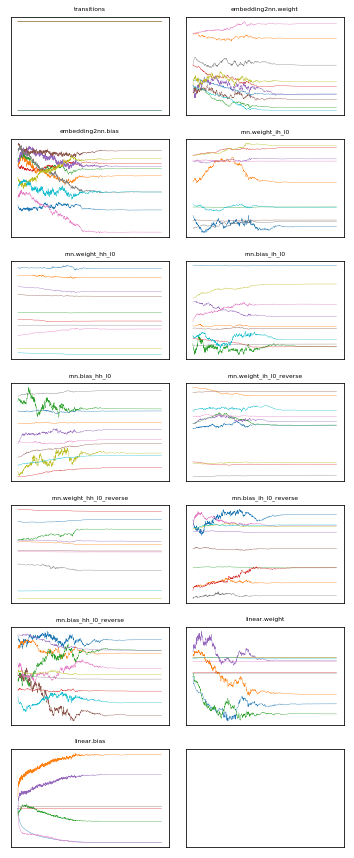

In [25]:
# 7. start training
trainer.train('../input/resources/taggers/example-ner',
              learning_rate=0.1,
              mini_batch_size=32,
              max_epochs=150)

# 8. plot training curves (optional)
from flair.visual.training_curves import Plotter
plotter = Plotter()
plotter.plot_training_curves('../input/resources/taggers/example-ner/loss.tsv')
plotter.plot_weights('../input/resources/taggers/example-ner/weights.txt')

In [26]:
plotter = Plotter()
plotter.plot_training_curves('../input/resources/taggers/example-ner/loss.tsv')

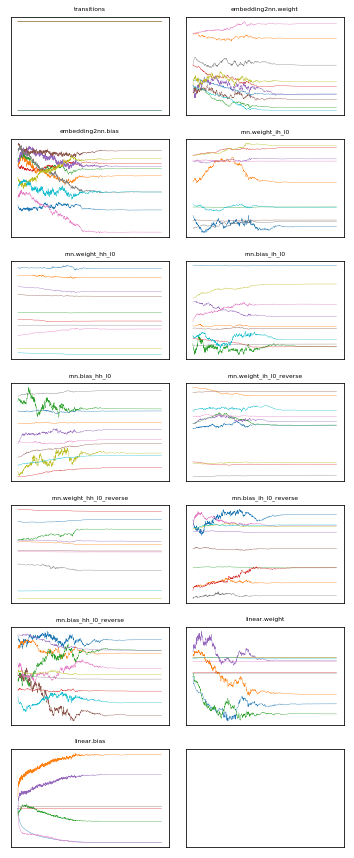

In [27]:
plotter.plot_weights('../input/resources/taggers/example-ner/weights.txt')

In [28]:
model = SequenceTagger.load_from_file('../input/resources/taggers/example-ner/final-model.pt')


In [29]:

# create example sentence
sentence = Sentence("""
ple who have a family history of abdominal aortic aneurysms are at increased risk of having the condition.
Atherosclerosis. Atherosclerosis — the buildup of fat and other substances that can damage the lining of a blood vessel — increases your risk of an aneurysm.
Other aneurysms. People who have an aneurysm in another large blood vessel, such as the artery behind the knee or the thoracic aorta in the chest, may have a higher risk of developing an abdominal aortic aneurysm.
High blood pressure. High blood pressure may increase your risk of developing an abdominal aortic aneurysm.
Complications
Tears in one or more of the layers of the wall of the aorta (aortic dissection) or a ruptured aortic aneurysm are the main complications of abdominal aortic aneurysms. A ruptured aortic aneurysm can lead to life-threatening internal bleeding. In general, the larger the aneurysm and the faster the aneurysm grows, the greater the risk of rupture.
Signs and symptoms that your aortic aneurysm has ruptured may include:
Sudden, intense and persistent abdominal or back pain, which can be described as a tearing sensation
Pain that radiates to your back or legs
Sweatiness
Clamminess
Dizziness
Nausea
Vomiting
Low blood pressure
Fast pulse
Another complication of aortic aneurysms is the risk of blood clots. Small blood clots can develop in the area of the aortic aneurysm. If a blood clot breaks loose from the inside wall of an aneurysm and blocks a blood vessel elsewhere in your body, it can cause pain or block the blood flow to the legs, toes, kidneys or abdominal organs.
""", use_tokenizer=True)

# predict tags and print
model.predict(sentence)

print(sentence.to_tagged_string())

ple who have a family history of abdominal <B-Disease> aortic <I-Disease> aneurysms <I-Disease> are at increased risk of having the condition . Atherosclerosis . Atherosclerosis — the buildup of fat and other substances that can damage the lining of a blood vessel — increases your risk of an aneurysm . Other aneurysms . People who have an aneurysm in another large blood vessel , such as the artery behind the knee or the thoracic aorta in the chest , may have a higher risk of developing an abdominal <B-Disease> aortic <I-Disease> aneurysm <I-Disease> . High blood pressure . High blood pressure may increase your risk of developing an abdominal <B-Disease> aortic <I-Disease> aneurysm <I-Disease> . Complications Tears in one or more of the layers of the wall of the aorta ( aortic dissection ) or a ruptured aortic <B-Disease> aneurysm <I-Disease> are the main complications of abdominal <B-Disease> aortic <I-Disease> aneurysms <I-Disease> . A ruptured aortic <B-Disease> aneurysm <I-Disease> 

In [30]:
for entity in sentence.get_spans('ner'):
    print(entity)

Disease-span [8,9,10]: "abdominal aortic aneurysms"
Disease-span [85,86,87]: "abdominal aortic aneurysm"
Disease-span [103,104,105]: "abdominal aortic aneurysm"
Disease-span [129,130]: "aortic aneurysm"
Disease-span [136,137,138]: "abdominal aortic aneurysms"
Disease-span [142,143]: "aortic aneurysm"
Disease-span [177,178]: "aortic aneurysm"
Disease-span [223,224]: "aortic aneurysms"
Disease-span [242,243]: "aortic aneurysm"
